<a href="https://colab.research.google.com/github/travensolli/formacao_dados_DNC/blob/main/Din%C3%A2mica_Individual_Day_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DINÂMICA DAY 03 - CONSULTORIA WALMART**

Problemática: Um gestor da área de dados da rede Walmart está em busca de uma consultoria  de dados para que possam trazer até ele um maior entendimento da relação  existente entre as vendas em dias de feriado e dias normais, além de uma  visualização sobre a taxa de desemprego em comparação com as vendas.



## **Importação das bibiliotecas**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Carregamento dos dados**

In [27]:
df=pd.read_csv("/content/Walmart.csv")

## **Análise descritiva dos dados**
Vamos verificar como os dados estão organizados no *dataset* analisando as 5 primeiras entradas.

In [28]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Vamos utilizar também a função *info( )* para identificar a quantidade de registros, os tipos das variáveis e possíveis valores nulos.

In [29]:
# identificar o volume de dados do DataFrame
print("Quantidade de registros: {}".format(df.shape[0]))
print("Quantidade de variáveis: {}\n".format(df.shape[1]))
# verificar os tipos de variáveis do dataset
display(df.info())

Quantidade de registros: 6435
Quantidade de variáveis: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

Verifica-se que para no *dataset* existem 8 atributos e 6435 registros, sem valores nulos.

### **Dicionário de variáveis**

O *dataset* possui colunas nomeadas que facilitam a identificação das informaçoes que ele nos traz, podendo ser estruturado o **dicionário de variáveis** a seguir:

* **Store** - identificação da Loja
* **Date** - data do registro
* **Weekly_Sales** - número de vendas na semana
* **Holiday_Flag** - sinalizador se a data é feriado ou não
* **Temperature** - temperatura do dia
* **Fuel_Price** - preço do combustível
* **CPI** -  Índice de Preços ao Consumidor Dominante
* **Unemployment** - taxa de desemprego

## **Etapa 01**


### **Realizar a contagem de feriados e quantidade de dias normais**

In [30]:
# contagem de feriados
feriados=df[df["Holiday_Flag"]==1]
print("O dataset possui {} registros como feriados.".format(feriados.shape[0]))

# contagem de dias normais
dias_normais=df[df["Holiday_Flag"]!=1]
print("O dataset possui {} registros como dias normais.".format(dias_normais.shape[0]))

O dataset possui 450 registros como feriados.
O dataset possui 5985 registros como dias normais.


### **Calcular as vendas durante os feriados e dias normais**


In [31]:
# vendas durante feriados
print("O dataset poussui {} em vendas semanais durante feriados.".format(feriados["Weekly_Sales"].sum()))

# vendas durante dias normais
print("O dataset poussui {} em vendas semanais durante dias normais.".format(dias_normais["Weekly_Sales"].sum()))

O dataset poussui 505299551.56 em vendas semanais durante feriados.
O dataset poussui 6231919435.55 em vendas semanais durante dias normais.


### **Plotar um gráfico do tipo barras, em que o eixo x seja referente a meses  e o eixo y a vendas semanais, onde é possível observar as vendas nos dias normais  e os feriados**


In [32]:
# converter a coluna "Date" para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# acrescentar a coluna de mês
df['Month'] = df['Date'].dt.month

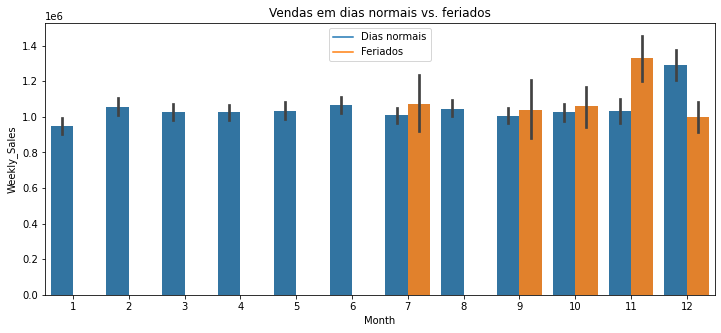

In [33]:
# gráfico de barras usando a biblioteca seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='Weekly_Sales', hue='Holiday_Flag', data=df)

# criar os handlers da legenda
normal_day = plt.Line2D([0], [0], color='#1f77b4', label='Dias normais', markerfacecolor='#1f77b4', markersize=15)
holiday = plt.Line2D([0], [0], color='#ff7f0e', label='Feriados', markerfacecolor='#ff7f0e', markersize=15)
# adicione uma legenda ao gráfico
plt.legend(handles=[normal_day, holiday])

# adicionar um título ao gráfico
plt.title('Vendas em dias normais vs. feriados')

# mostrar o gráfico
plt.show()

## **Etapa 02**



### **Preço médio da gasolina em feriados e em dias normais**

In [34]:
print("O preço médio da gasolina em feriados é de: {:.2f}".format(feriados.Fuel_Price.mean()))
print("O preço médio da gasolina em dias normais é de: {:.2f}".format(dias_normais.Fuel_Price.mean()))

O preço médio da gasolina em feriados é de: 3.23
O preço médio da gasolina em dias normais é de: 3.37


### **Plotar um gráfico do preço mensal da gasolina em dias normais e em  feriados**


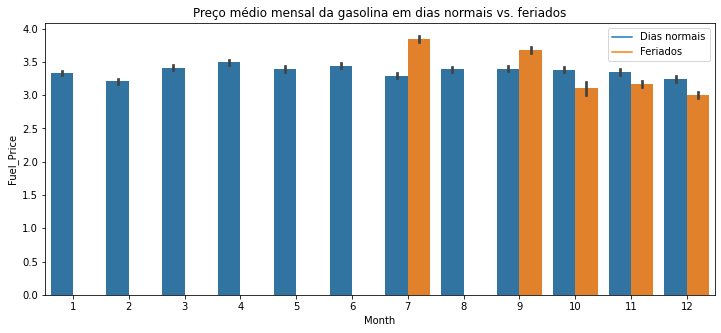

In [35]:
# gráfico de barras usando a biblioteca seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='Fuel_Price', hue='Holiday_Flag', data=df)

# criar os handlers da legenda
normal_day = plt.Line2D([0], [0], color='#1f77b4', label='Dias normais', markerfacecolor='#1f77b4', markersize=15)
holiday = plt.Line2D([0], [0], color='#ff7f0e', label='Feriados', markerfacecolor='#ff7f0e', markersize=15)
# adicionar uma legenda ao gráfico
plt.legend(handles=[normal_day, holiday])

# adicionar um título ao gráfico
plt.title('Preço médio mensal da gasolina em dias normais vs. feriados')

# mostrar o gráfico
plt.show()

### **Mês com preço máximo da gasolina**

In [36]:
df.groupby(['Month']).agg({'Fuel_Price':'max'}).sort_values('Fuel_Price',ascending=False).reset_index()

,Month,Fuel_Price
0,12,4.468
1,10,4.449
2,5,4.308
3,3,4.294
4,6,4.282
5,1,4.277
6,4,4.254
7,9,4.250
8,11,4.186
9,2,4.178


## **Etapa 03**



### **Plotar um gráfico de dispersão com a taxa de desemprego  por quantidade de vendas.**

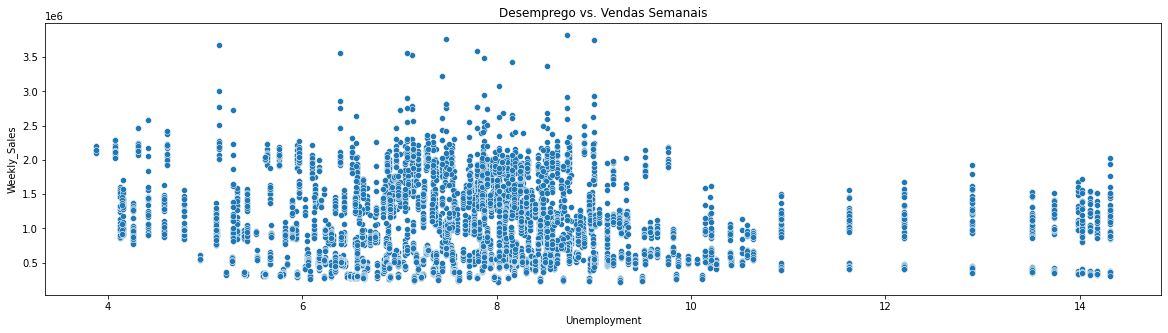

In [37]:
plt.figure(figsize=(20, 5))
# plotar o gráfico de dispersão
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)

# adicionar um título ao gráfico
plt.title('Desemprego vs. Vendas Semanais')

# mostrar o gráfico
plt.show()

## **Perguntas**


### A taxa de desemprego afeta na quantidade de vendas? Se sim dê uma  breve explicação sobre isso.
A taxa de desemprego pode ter um impacto significativo na quantidade de vendas. Quando a taxa de desemprego é alta, menos pessoas estão empregadas e, portanto, tendem a ter menos renda disponível para gastar. Além disso, a incerteza e a preocupação com a situação financeira podem levar a uma redução na confiança dos consumidores e, consequentemente, a uma diminuição nas vendas. Por outro lado, quando a taxa de desemprego é baixa, mais pessoas estão empregadas e tendem a ter mais renda disponível, o que pode aumentar as vendas. É importante notar que a taxa de desemprego é apenas um dos muitos fatores que afetam as vendas e que o impacto pode variar de acordo com o setor ou o produto em questão.


### Qual o mês que tem o maior valor da gasolina?

O mês de abril possui maior valor médio da gasolina em dias normais. Enquanto o mês de julho possui maior valor médio da gasolina em dias de feriados.

Já numa ótica de valor máximo, o mês de dezembro atingiu o maior valor da gasolina.



### Por qual possível motivo novembro tem o maior número de vendas nos  feriados? Pesquise sobre os feriados de fim de ano dos USA.

Novembro pode ter o maior número de vendas nos feriados devido ao feriado de Ação de Graças nos Estados Unidos, que é celebrado na 4ª quinta-feira de novembro. A Ação de Graças é tradicionalmente um momento de reunião com a família e amigos, e muitas pessoas fazem compras para preparar suas refeições e presentes. Além disso, novembro é um mês prévio ao Natal, o que pode levar as pessoas a fazerem compras antecipadas de presentes. Portanto, é provável que a combinação dessas duas datas comemorativas possa explicar o aumento de vendas nos feriados de novembro.